In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('compare_automl.csv')

In [3]:
cols = df.columns[1:]

In [4]:
cols

Index(['autosklearn', 'autoweka', 'constantpredictor', 'h2oautoml',
       'randomforest', 'tpot', 'tunedrandomforest', 'Auto-PyTorch'],
      dtype='object')

In [5]:
c = ['#1b9e77',
'#d95f02',
'black' ,
'#7570b3',
'#e7298a',
'#66a61e',
'#e6ab02',
'#a6761d']

In [8]:
df = df.replace({'0.790757 (6)' : '0.790757', '0.84251 (1)' : '0.84251', '0.818407 (1)':'0.818407'})

In [9]:
df = df.fillna(0.5)

In [10]:
df['autosklearn'] = df['autosklearn'].astype(float)

In [11]:
df['tpot'] = df['tpot'].astype(float)
df['autoweka'] = df['autoweka'].astype(float)

In [12]:
df

,task,autosklearn,autoweka,constantpredictor,h2oautoml,randomforest,tpot,tunedrandomforest,Auto-PyTorch
0,amazon_employee_access,0.855949,0.809032,0.5,0.879249,0.864145,0.869550,0.862834,0.848398
1,apsfailure,0.991173,0.964659,0.5,0.992338,0.991212,0.990257,0.990772,0.991576
2,australian,0.935352,0.929447,0.5,0.939702,0.936597,0.931933,0.933904,0.934074
3,bank-marketing,0.937332,0.826706,0.5,0.937070,0.930829,0.933684,0.930685,0.936074
4,blood-transfusion,0.757376,0.740807,0.5,0.756301,0.686283,0.724372,0.688562,0.744596
5,christine,0.829747,0.801988,0.5,0.825998,0.805780,0.813402,0.809603,0.800205
6,credit-g,0.782619,0.752548,0.5,0.788809,0.794667,0.786143,0.795524,0.770667
7,guiellermo,0.901298,0.878182,0.5,0.909924,0.902647,0.819224,0.902757,0.900215
8,higgs,0.793323,0.676984,0.5,0.813504,0.802973,0.801550,0.802942,0.808448
9,jasmine,0.883949,0.860555,0.5,0.887816,0.888259,0.884588,0.889133,0.880538


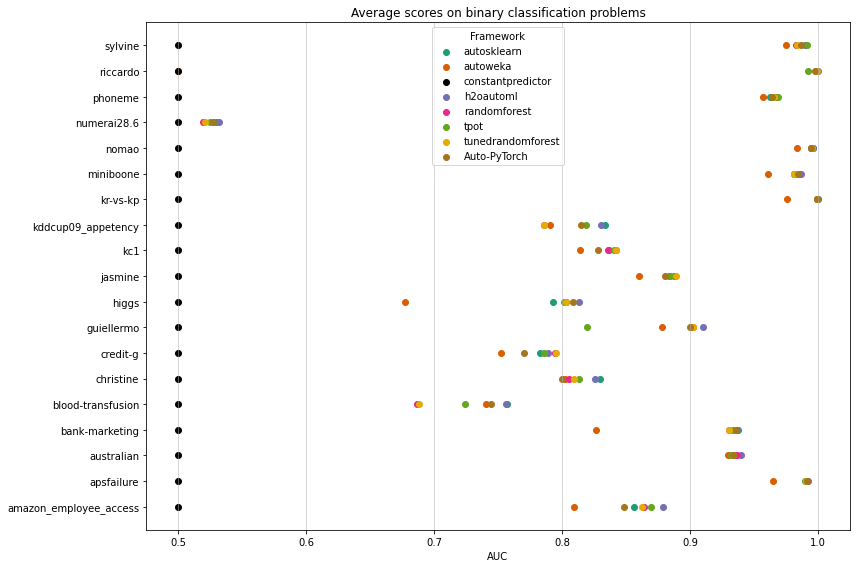

In [13]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})
plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.scatter(x=cols[i], y='task', data=df, label=cols[i], c=c[i])
#plt.grid(axis = 'y', linestyle = '--', linewidth = 0.2)
plt.grid(axis = 'x', linewidth = 0.5)
plt.legend(title = "Framework", loc='upper center')
plt.title('Average scores on binary classification problems')
plt.xlabel("AUC")
plt.savefig('other.png')

In [9]:
sc = []
for i in range(19):
    c = (df['Auto-PyTorch'][i] > df.iloc[i,1:]).sum()
    sc.append(c)

In [10]:
df.iloc[0,1:].tolist()

[0.855949,
 0.809032,
 0.5,
 0.879249,
 0.864145,
 0.86955,
 0.862834,
 0.8483982579346492]

In [85]:
np.array(sc).mean()

3.5789473684210527